# Install necessary libraries

In [1]:
!pip install gensim transformers sentence-transformers scikit-learn requests scipy matplotlib

# Import required libraries

In [7]:
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import requests
import numpy as np

# Step 1: Load datasets

In [3]:
base_url = "https://jlu.myweb.cs.uwindsor.ca/8380/"
icse_text = requests.get(base_url + "icse.txt").text.split('\n')
sigmod_text = requests.get(base_url + "sigmod.txt").text.split('\n')

# Preprocess the data

In [4]:
def preprocess(text_lines):
    return [line.lower().strip().split(' ') for line in text_lines if line.strip()]

icse_sentences = preprocess(icse_text)
#sigmod_sentences = preprocess(sigmod_text)

# Step 2: Train Word2Vec embeddings

In [5]:
w2v_model = Word2Vec(icse_sentences, vector_size=100, window=5, min_count=3, sg=1, epochs=50)

# Visualize embeddings with PCA

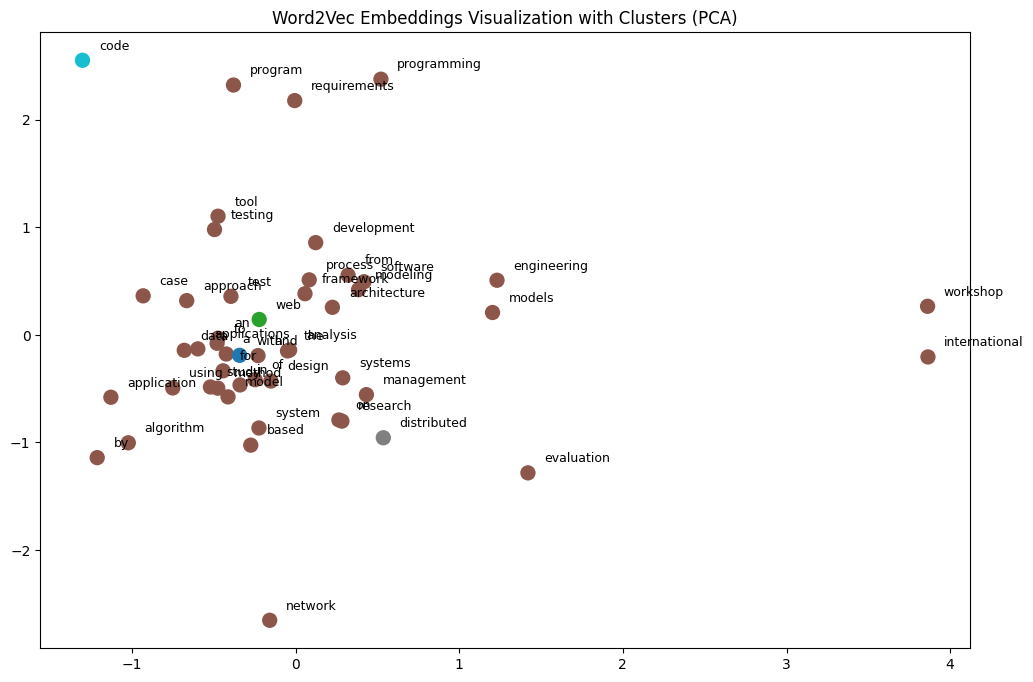

In [8]:
# Subset top words
top_words = w2v_model.wv.index_to_key[:50]
vectors = w2v_model.wv[top_words]

# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(vectors)

# Plot with clusters
plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=100)
for i, word in enumerate(top_words):
    plt.text(reduced[i, 0] + 0.1, reduced[i, 1] + 0.1, word, fontsize=9)
plt.title("Word2Vec Embeddings Visualization with Clusters (PCA)")
plt.show()